In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import numpy as np

# Squelette vs nombre et longueur des trajectoires (sachant k)

In [19]:
data = pd.read_csv("data/learner_skeleton_ntraj_length.csv")

In [20]:
dict_cols = ['count', 'skeleton_count']
for col in dict_cols:
    data[col] = data[col].apply(ast.literal_eval)
    data[f'{col}_tp'] = data[col].apply(lambda d: d.get('tp', 0))
    data[f'{col}_tn'] = data[col].apply(lambda d: d.get('tn', 0))
    data[f'{col}_fp'] = data[col].apply(lambda d: d.get('fp', 0))
    data[f'{col}_fn'] = data[col].apply(lambda d: d.get('fn', 0))
    data.drop(columns=[col], inplace=True)

In [21]:
avg_df = data.groupby('config_id').mean(numeric_only=True).reset_index()

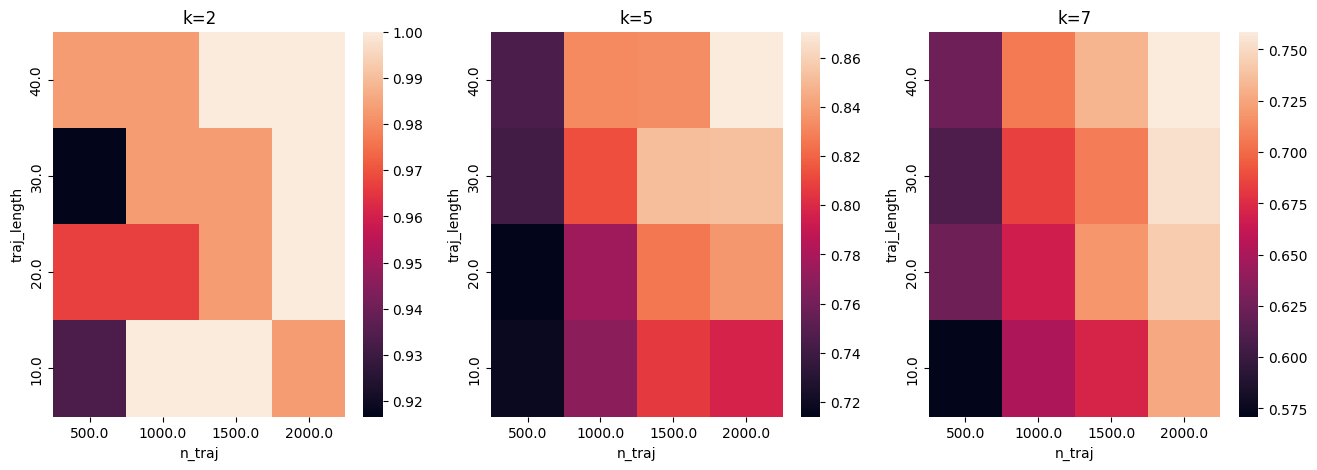

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(16,5))
i = 0

for k in data['k'].unique():
    
    pivot = avg_df[avg_df['k'] == k].pivot_table(index="traj_length", columns="n_traj", values="skeleton_fscore")
    sns.heatmap(pivot,ax=axes[i])
    axes[i].set_title(f'k={k}')
    axes[i].invert_yaxis()
    i+=1

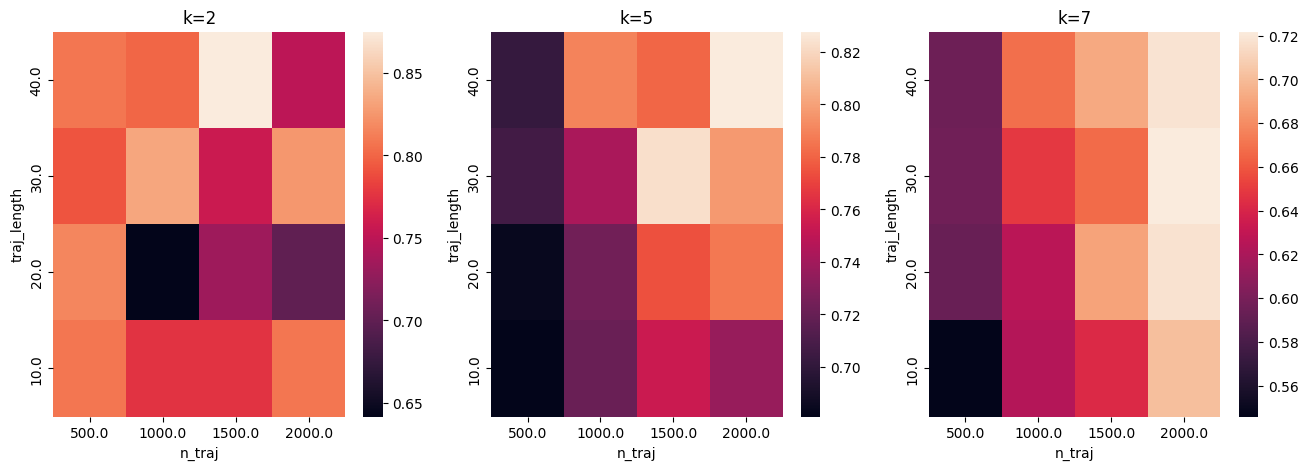

In [8]:
fig, axes = plt.subplots(1,3,figsize=(16,5))
i = 0

for k in data['k'].unique():
    
    pivot = avg_df[avg_df['k'] == k].pivot_table(index="traj_length", columns="n_traj", values="fscore")
    sns.heatmap(pivot,ax=axes[i])
    axes[i].set_title(f'k={k}')
    axes[i].invert_yaxis()
    i+=1

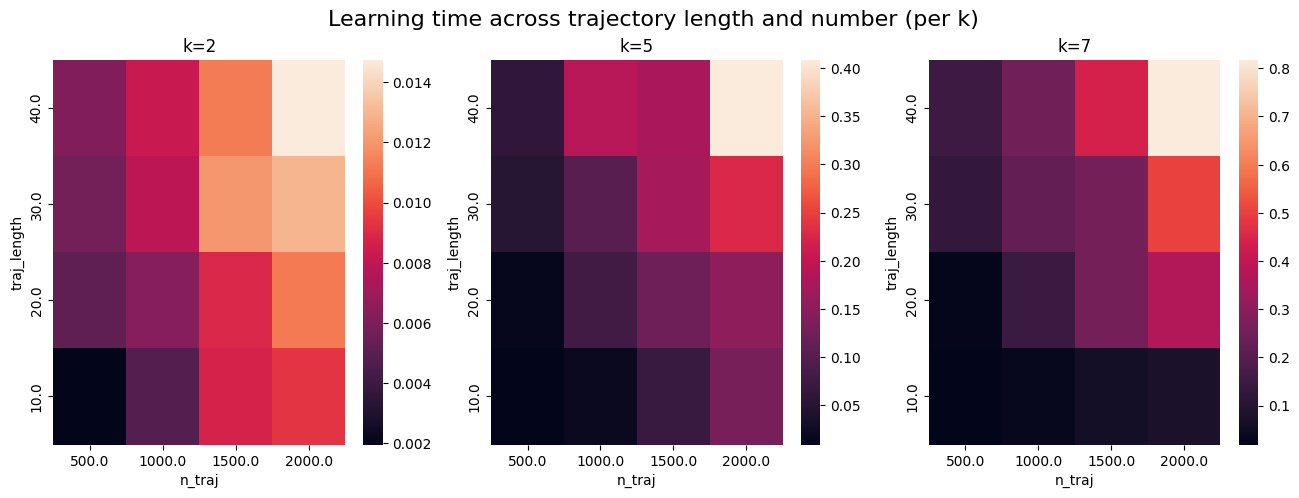

In [9]:
fig, axes = plt.subplots(1,3,figsize=(16,5))
fig.suptitle("Learning time across trajectory length and number (per k)", fontsize=16)
i = 0

for k in data['k'].unique():
    
    pivot = avg_df[avg_df['k'] == k].pivot_table(index="traj_length", columns="n_traj", values="learning_time")
    sns.heatmap(pivot,ax=axes[i])
    axes[i].set_title(f'k={k}')
    axes[i].invert_yaxis()
    i+=1

# Distance en probabilité vs nombre et longueur des trajectoires (sachant k)

In [32]:
data = pd.read_csv("data/learner_proba_ntraj_length.csv")

In [33]:
avg_df = data.groupby('config_id').mean(numeric_only=True).reset_index()

In [34]:
counts = avg_df['n_traj'].value_counts()
valid_n_traj = counts[counts > 12].index
avg_df = avg_df[avg_df['n_traj'].isin(valid_n_traj)]


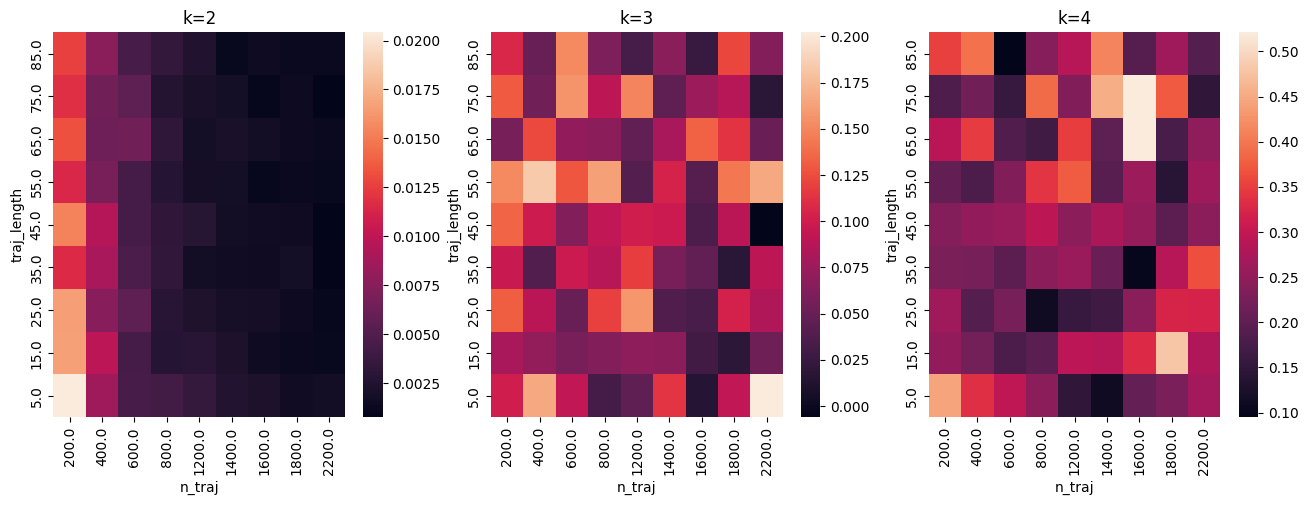

In [37]:
fig, axes = plt.subplots(1,3,figsize=(16,5))
i = 0


for k in data['k'].unique():
    
    pivot = avg_df[avg_df['k'] == k].pivot_table(index="traj_length", columns="n_traj", values="klPQ")
    sns.heatmap(pivot, ax=axes[i], mask=pivot.isna(), cbar=True)

    axes[i].set_title(f'k={k}')
    axes[i].invert_yaxis()
    i+=1

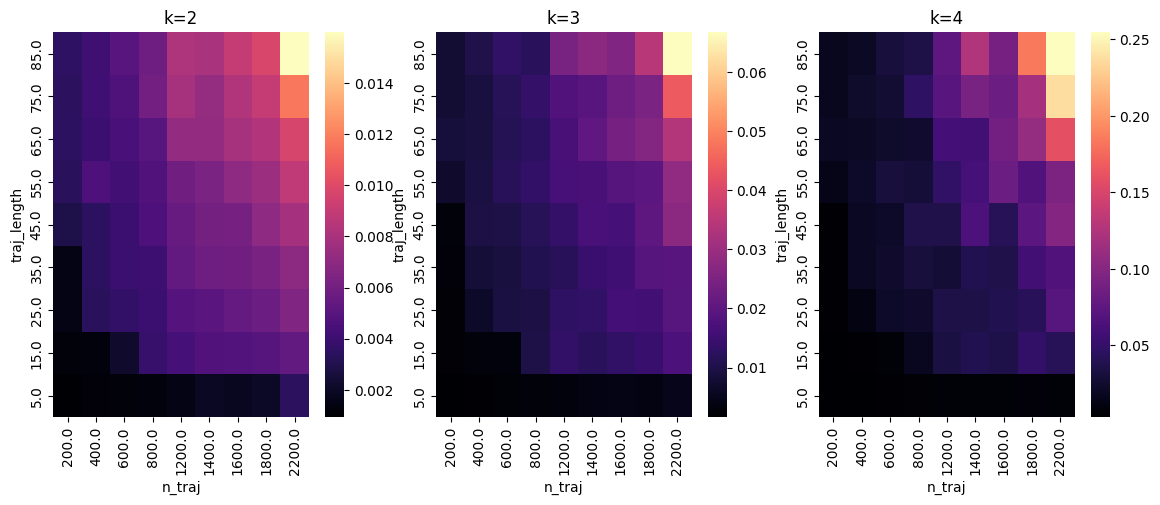

In [14]:
fig, axes = plt.subplots(1,3,figsize=(14,5))
i = 0


for k in data['k'].unique():
    
    pivot = avg_df[avg_df['k'] == k].pivot_table(index="traj_length", columns="n_traj", values="learning_time")
    sns.heatmap(pivot, ax=axes[i], mask=pivot.isna(), cmap="magma", cbar=True)

    axes[i].set_title(f'k={k}')
    axes[i].invert_yaxis()
    i+=1

In [15]:
data['taille'] = data.n_traj*data.traj_length

<Axes: xlabel='taille', ylabel='learning_time'>

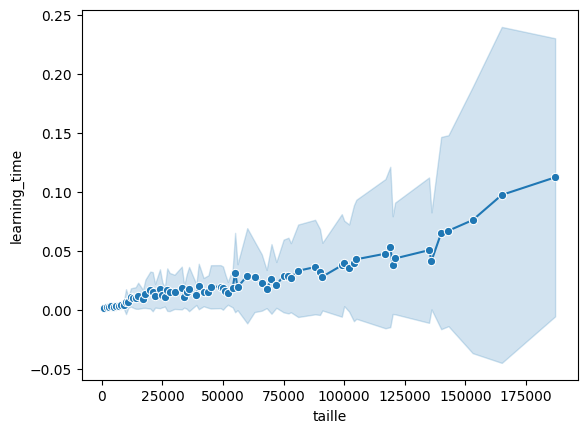

In [17]:
sns.lineplot(
data=data,
x='taille',
y="learning_time",
errorbar="sd",
marker="o"
)

# Learning time vs number of trajectories and vs trajectory length

In [13]:
ntraj = pd.read_csv("data/learner_time_n_traj.csv")
trajlen = pd.read_csv("data/learner_time_traj_l.csv")

In [14]:
# Filter outliers
ntraj = ntraj[ntraj['learning_time'] < 0.04]

<Axes: xlabel='traj_length', ylabel='learning_time'>

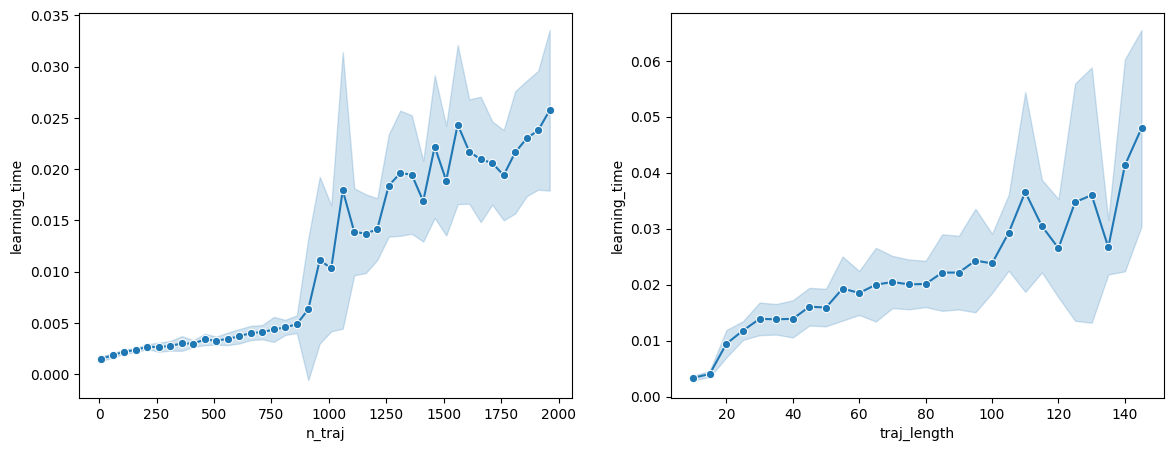

In [15]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
i = 0

sns.lineplot(
data=ntraj,
x="n_traj",
y="learning_time",
errorbar="sd",
marker="o",
ax=axes[0]
)
sns.lineplot(
data=trajlen,
x="traj_length",
y="learning_time",
errorbar="sd",
marker="o",
ax=axes[1]
)


# K vs true K

In [2]:
data = pd.read_csv("data/klearner_k_vs_truek.csv")

In [3]:
data['success'] = data['k'] == data["learned_k"]

In [4]:
avg_df = data.groupby('config_id').mean().reset_index()

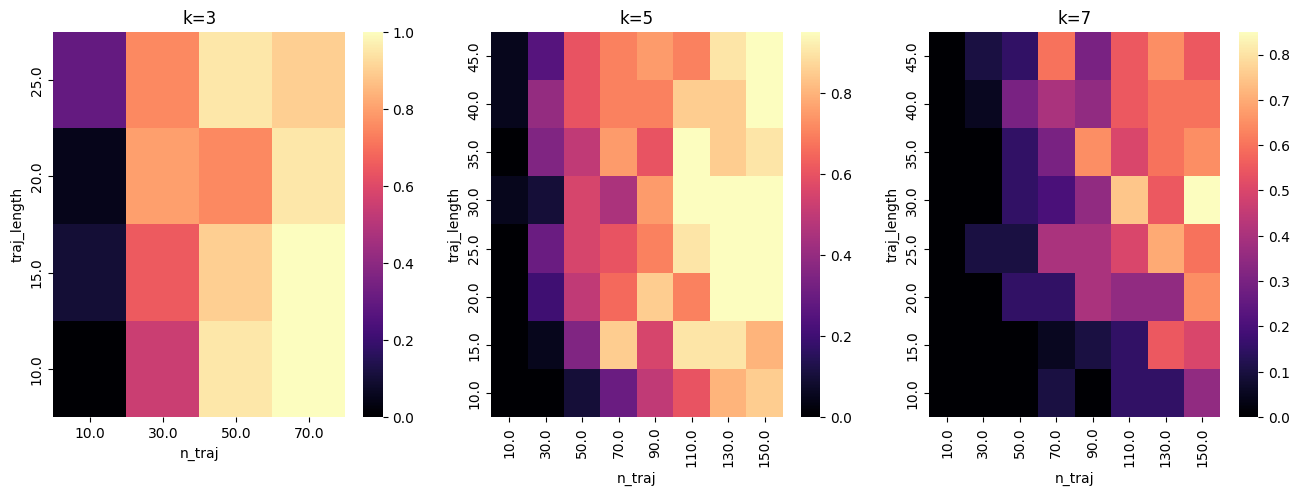

In [5]:
fig, axes = plt.subplots(1,3,figsize=(16,5))
i = 0

for k in data['k'].unique():
    
    pivot = avg_df[avg_df['k'] == k].pivot_table(index="traj_length", columns="n_traj", values="success")
    sns.heatmap(pivot, ax=axes[i], mask=pivot.isna(), cmap="magma", cbar=True)

    axes[i].set_title(f'k={k}')
    axes[i].invert_yaxis()
    i+=1

## Hist

In [2]:
data = pd.read_csv("data/learned_k_hist.csv")

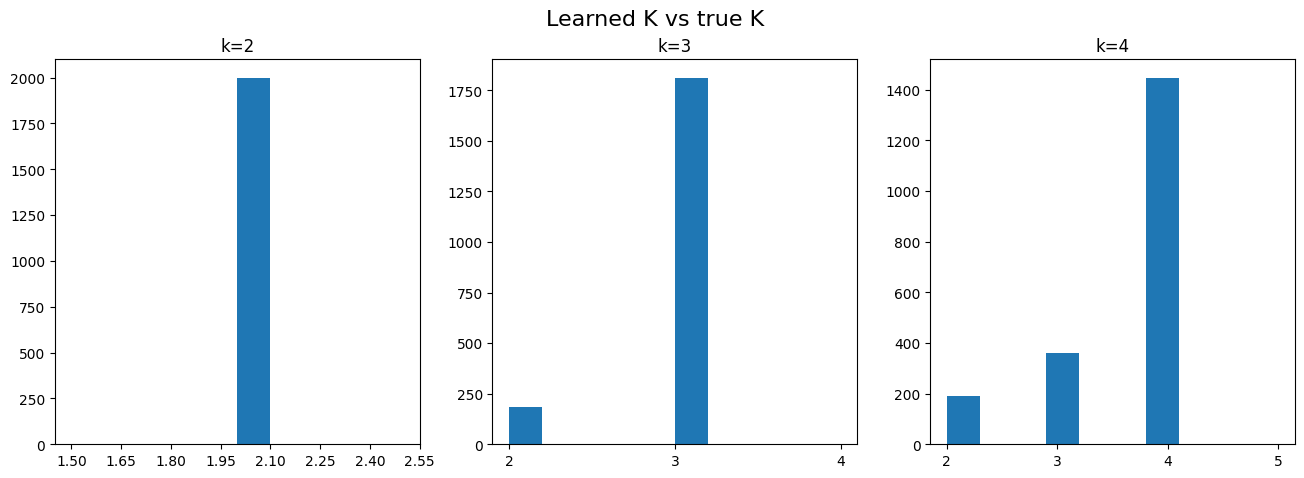

In [3]:
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(1,3,figsize=(16,5))
i = 0
plt.suptitle("Learned K vs true K", fontsize=16)

for k in data['k'].unique():
    
    subset = data[data['k'] == k]
    
    axes[i].hist(subset['learned_k'])
    axes[i].set_title(f'k={k}')
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    #axes[i].invert_yaxis()
    i+=1